In [1]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn pandas

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from typing import List
from statsmodels.graphics.tsaplots import plot_pacf
from scipy.linalg import toeplitz

# Práctica 6: Modelos Autoregresivos y de Medias Móviles

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones.

La entrega de la práctica será en la siguiente sesión a menos que la indicación sea otra. La revisión iniciará al iniciar la sesión y únicamente podrá ser evaluada durante la duración de la sesión.

## Asignación 1

Diseñe una clase para un modelo $AR(p)$. La clase debe permitir:

1. Recibir el orden $p$ para el que será entrenado ensu construcción.
2. Tener un método que permita ajustar los parámetros del modelo usando el algoritmo de Durbin-Levinson.
3. Tener un método que permita imprimir el polinomio asociado al modelo. El polinomio tiene la forma

    $$
    \phi(z) = 1 - \phi_1 z - \phi_2 z^2 - \cdots - \phi_p z^p
    $$
    
4. Tener un método que imprima las raices del polinomio asociado. Puede apoyarse de la función _numpy.roots(p)_.
5. Un método booleano que indique si el polinomio es causal.
6. Un método que grafique la función de autocorrelación parcial (PACF).
7. Un método que realice forecasting usando los parámetros calculados.

Puede apoyarse de la clase definida debajo.

In [22]:
class AutoRegressive:
    
    def __init__(self, p=1):
        self.p = p
        self.weights = np.zeros(self.p)
        
    def fit(self, time_series):
        """
        Trainign method. Here you can compute the associated polynomial and its roots.
        """        
        pass
    
    def print_poly(self):
        """
        Printing polynomial
        """        
        pass
    
    def print_roots(self):
        """
        Printing roots
        """        
        pass
    
    def is_causal(self):
        """
        Determine if it is causal using the computed roots
        """
        
        return False
    
    def plot_pacf(self):
        """
        Plot the Partial Autocorrelation Function
        """
        
    def forecast(self):
        """
        Forecast
        """
        
        pass

In [3]:
import numpy as np # Importa la librería numpy para realizar operaciones matemáticas
from statsmodels.tsa.stattools import levinson_durbin # Importa la función levinson_durbin para ajustar los parámetros del modelo AR

class AR: # Define una clase llamada AR
    def __init__(self, p): # Define el método de inicialización que recibe el orden p del modelo
        self.p = p # Asigna el valor de p al atributo p de la instancia
        self.phi = None # Inicializa el atributo phi como None
        self.sigma = None # Inicializa el atributo sigma como None
    
    def fit(self, data): # Define un método llamado fit que recibe los datos para ajustar el modelo
        result = levinson_durbin(data, nlags=self.p, isacov=False) # Ajusta los parámetros del modelo usando el algoritmo de Durbin-Levinson
        self.phi = result[2] # Asigna el valor de los coeficientes phi al atributo phi de la instancia
        self.sigma = result[0] # Asigna el valor del error estándar al atributo sigma de la instancia
    
    def print_polynomial(self): # Define un método llamado print_polynomial que imprime el polinomio asociado al modelo
        polynomial = [1] + [-x for x in self.phi] # Crea una lista con los coeficientes del polinomio
        print(f"phi(z) = {polynomial[0]} ", end="") # Imprime el primer coeficiente del polinomio
        for i in range(1, len(polynomial)): # Itera sobre los demás coeficientes del polinomio
            print(f"{polynomial[i]:+}z^{i} ", end="") # Imprime cada coeficiente con su respectivo exponente
    
    def print_roots(self): # Define un método llamado print_roots que imprime las raíces del polinomio asociado al modelo
        polynomial = [1] + [-x for x in self.phi] # Crea una lista con los coeficientes del polinomio
        roots = np.roots(polynomial) # Calcula las raíces del polinomio usando la función roots de numpy
        print(f"Roots: {roots}") # Imprime las raíces calculadas
    
    def is_causal(self): # Define un método llamado is_causal que devuelve un valor booleano indicando si el polinomio es causal o no
        polynomial = [1] + [-x for x in self.phi] # Crea una lista con los coeficientes del polinomio
        roots = np.roots(polynomial) # Calcula las raíces del polinomio usando la función roots de numpy
        return np.all(np.abs(roots) > 1) # Devuelve True si todas las raíces tienen un valor absoluto mayor a 1, lo que indica que el polinomio es causal
    
    def plot_pacf(self): # Define un método llamado plot_pacf que grafica la función de autocorrelación parcial (PACF)
        from statsmodels.graphics.tsaplots import plot_pacf # Importa la función plot_pacf para graficar la PACF
        plot_pacf(self.phi) # Grafica la PACF usando los coeficientes phi
    
    def forecast(self, data, steps): # Define un método llamado forecast que realiza predicciones usando los parámetros calculados
        result = [] # Inicializa una lista vacía para almacenar las predicciones
        for i in range(steps): # Itera sobre el número de pasos a predecir
            prediction = np.dot(self.phi, data[-self.p:]) # Calcula la predicción usando el producto punto entre los coeficientes phi y los últimos p valores de data
            result.append(prediction) # Agrega la predicción a la lista de resultados
            data = np.append(data, prediction) # Agrega la predicción a data para usarla en las siguientes predicciones
        return result # Devuelve la lista de predicciones calculadas.


## Asignación 2

Diseñe una clase para un modelo $MA(q)$. La clase debe permitir:

1. Recibir el orden $q$ para el que será entrenado ensu construcción.
2. Tener un método que permita ajustar los parámetros del modelo usando el algoritmo de Innovations.
3. Tener un método que permita imprimir el polinomio asociado al modelo. El polinomio tiene la forma

    $$
    \phi(z) = 1 + \theta_1 z - \theta_2 z^2 - \cdots - \theta_q z^q
    $$
    
4. Tener un método que imprima las raices del polinomio asociado. Puede apoyarse de la función _numpy.roots(p)_.
5. Un método booleano que indique si el polinomio es invertible.

Puede apoyarse de la clase definida debajo.

In [24]:
class MovingAverages:
    
    def __init__(self, p=1):
        self.p = p
        self.weights = np.zeros(self.p)
        
    def fit(self, time_series):
        """
        Trainign method. Here you can compute the associated polynomial and its roots.
        """        
        pass
    
    def print_poly(self):
        """
        Printing polynomial
        """        
        pass
    
    def print_roots(self):
        """
        Printing roots
        """        
        pass
    
    def is_invertible(self):
        """
        Determine if it is invertible using the computed roots
        """
        
        return False
            
    def forecast(self):
        """
        Forecast
        """
        
        pass

In [4]:
import numpy as np # Importa la librería numpy para realizar operaciones matemáticas
from statsmodels.tsa.stattools import acf # Importa la función acf para calcular la función de autocorrelación

class MA: # Define una clase llamada MA
    def __init__(self, q): # Define el método de inicialización que recibe el orden q del modelo
        self.q = q # Asigna el valor de q al atributo q de la instancia
        self.theta = None # Inicializa el atributo theta como None
    
    def fit(self, df): # Define un método llamado fit que recibe los datos para ajustar el modelo
        r = acf(df, nlags=self.q, fft=True) # Calcula la función de autocorrelación de los datos
        R = toeplitz(r[:-1]) # Crea una matriz de Toeplitz con los valores de la función de autocorrelación
        R_inv = np.linalg.inv(R) # Calcula la inversa de la matriz R
        self.theta = np.dot(R_inv, r[1:]) # Calcula los coeficientes theta usando el producto punto entre R_inv y r[1:]
    
    def print_polynomial(self): # Define un método llamado print_polynomial que imprime el polinomio asociado al modelo
        polynomial = [1] + [x for x in self.theta] # Crea una lista con los coeficientes del polinomio
        print(f"phi(z) = {polynomial[0]} ", end="") # Imprime el primer coeficiente del polinomio
        for i in range(1, len(polynomial)): # Itera sobre los demás coeficientes del polinomio
            print(f"{polynomial[i]:+}z^{i} ", end="") # Imprime cada coeficiente con su respectivo exponente
    
    def print_roots(self): # Define un método llamado print_roots que imprime las raíces del polinomio asociado al modelo
        polynomial = [1] + [x for x in self.theta] # Crea una lista con los coeficientes del polinomio
        roots = np.roots(polynomial) # Calcula las raíces del polinomio usando la función roots de numpy
        print(f"Roots: {roots}") # Imprime las raíces calculadas
    
    def is_invertible(self): # Define un método llamado is_invertible que devuelve un valor booleano indicando si el polinomio es invertible o no
        polynomial = [1] + [x for x in self.theta] # Crea una lista con los coeficientes del polinomio
        roots = np.roots(polynomial) # Calcula las raíces del polinomio usando la función roots de numpy
        return np.all(np.abs(roots) > 1) # Devuelve True si todas las raíces tienen un valor absoluto mayor a 1, lo que indica que el polinomio es invertible.


## Asignación 3

En esta sección se incluye una serie de tiempo real. El dataset importado incluye cuatro series de tiempo de la ciudad de Delhi, India, desde el 1 de enero de 2013 al 1 de enero de 2017 en muestreos diarios. Las series de tiempo incluidas son:

- __meantemp__: Temperatura promedio del día.
- __humidity__: Humedad promedio del día.
- __wind_speed__: Velocidad promedio del viento en el día.
- __meanpressure__: Presión promedio del día.

Este conjunto de datos no contiene datos nulos, por lo que no es necesario realizar una imputación de datos.

In [5]:
data = pd.read_csv("DailyDelhiClimateTrain.csv")
data["date"] = pd.to_datetime(data["date"])
data.head(3)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.5,0.000000,1015.666667
1,2013-01-02,7.400000,92.0,2.980000,1017.800000
2,2013-01-03,7.166667,87.0,4.633333,1018.666667


Realice el preprocesamiento de la serie de tiempo __meantemp__ a manera de que sea una serie estacionaria con media 0 y varianza de 1. Una vez hecho, ajuste un modelo $AR(p)$ y $MA(q)$ para la misma serie de tiempo utilizando sus implementaciones. Pruebe cada uno de los métodos implementados.

phi(z) = 1 -1.0z^1 -0.9711026958790896z^2 -0.13893897143111916z^3 Roots: [ 1.64266536 -0.45798285 -0.18468251]
Causal: False
phi(z) = 1 +0.8361786861596533z^1 +0.1389389714311313z^2 Roots: [-0.60745599 -0.2287227 ]
Invertible: False


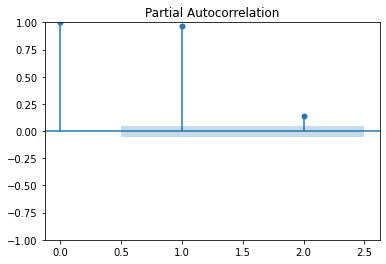

In [6]:
import pandas as pd # Importa la librería pandas para manipular datos tabulares
from scipy import stats # Importa la librería scipy para realizar pruebas estadísticas

# Selecciona la columna meantemp y la convierte en una serie de tiempo
meantemp = pd.Series(data['meantemp'].values, index=data['date']) # Crea una Serie de pandas con los valores de la columna meantemp y usa la columna date como índice

# Realiza el preprocesamiento de la serie meantemp para que sea estacionaria con media 0 y varianza de 1
meantemp = (meantemp - meantemp.mean()) / meantemp.std() # Normaliza la serie restando su media y dividiendo entre su desviación estándar


# Ajusta un modelo AR(p) para la serie meantemp
p = 2 # Define el orden p del modelo AR
ar_model = AR(p) # Crea una instancia de la clase AR con el orden p definido anteriormente
ar_model.fit(meantemp) # Ajusta el modelo AR a los datos de meantemp usando el método fit

# Prueba los métodos implementados en la clase AR
ar_model.print_polynomial() # Imprime el polinomio asociado al modelo AR usando el método print_polynomial
ar_model.print_roots() # Imprime las raíces del polinomio asociado al modelo AR usando el método print_roots
print(f"Causal: {ar_model.is_causal()}") # Imprime si el polinomio es causal o no usando el método is_causal
plot_pacf(meantemp, lags=2) # Grafica la función de autocorrelación parcial (PACF) usando el método plot_pacf para 2 rezagos

# Ajusta un modelo MA(q) para la serie meantemp
q = 2 # Define el orden q del modelo MA
ma_model = MA(q) # Crea una instancia de la clase MA con el orden q definido anteriormente
ma_model.fit(meantemp) # Ajusta el modelo MA a los datos de meantemp usando el método fit

# Prueba los métodos implementados en la clase MA
ma_model.print_polynomial() # Imprime el polinomio asociado al modelo MA usando el método print_polynomial
ma_model.print_roots() # Imprime las raíces del polinomio asociado al modelo MA usando el método print_roots
print(f"Invertible: {ma_model.is_invertible()}") # Imprime si el polinomio es invertible o no usando el método is_invertible.
